In [891]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

np.random.seed(60)

In [892]:
# Initial conditions
mBR = 1
mBA = 1
mCLN = 0
Cln = 0
BR = 25
BAm = 8.5
BAd = 0
A0 = 5 * 5**(1/3)
f=0
e = 0

y0 = [mCLN, Cln, BR, BAm, BAd]

# Parameters
kd1 = 0.1
kd2_G = 0.1
kp = 0.35
kR_G = 4.75
kAd_G = 0
kAm_G = 1
kgrowth = 0.02 
kR_M = 2
kAd_M =  1
kAm_M =  0
kx = 1
kd2_M = 10

# Simulation time
t0 = 0
t_end = 1000

In [893]:
# Model
def AdurchV(BAm, BAd):
    f = 1/np.sqrt(A0+ kx*(BAm + BAd))
    return f

def model(t, y, flaag):
    mCLNi, Clni, BRi, BAmi, BAdi = y
    # Function
    L = [np.random.randint(0,2), 0]
    # model functions
    if Clni >= 150 :
        flaag.append(1)
    elif mCLNi < 0.01:
        flaag.append(0)
    else:
        flaag.append(2)
    if flaag[-1] == 0:
        dmCLN = -kd1*mCLNi+L[0]
        dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_G*Clni
        dBR = kgrowth*(kR_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
        dBAm = kgrowth*(kAm_G/(kR_G+kAm_G+kAd_G))*mBA*BRi*AdurchV(BAmi, BAdi)
        dBAd = kgrowth*(kAd_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
    elif flaag[-1] == 1:
        dmCLN = -kd1*mCLNi+L[1]
        dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_M*Clni
        dBR = kgrowth*(kR_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
        dBAm = kgrowth*(kAm_M/(kR_M+kAm_M+kAd_M))*mBA*BRi*AdurchV(BAmi, BAdi)
        dBAd = kgrowth*(kAd_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
    else:
        flaag = [i for i in flaag if i != 2]
        if flaag[-1] == 0:
            dmCLN = -kd1*mCLNi+L[0]
            dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_G*Clni
            dBR = kgrowth*(kR_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
            dBAm = kgrowth*(kAm_G/(kR_G+kAm_G+kAd_G))*mBA*BRi*AdurchV(BAmi, BAdi)
            dBAd = kgrowth*(kAd_G/(kR_G+kAm_G+kAd_G))*mBR*BRi*AdurchV(BAmi, BAdi)
        elif flaag[-1] == 1:
            dmCLN = -kd1*mCLNi+L[1]
            dCln = kp*mCLNi*BRi*AdurchV(BAmi, BAdi)-kd2_M*Clni
            dBR = kgrowth*(kR_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
            dBAm = kgrowth*(kAm_M/(kR_M+kAm_M+kAd_M))*mBA*BRi*AdurchV(BAmi, BAdi)
            dBAd = kgrowth*(kAd_M/(kR_M+kAm_M+kAd_M))*mBR*BRi*AdurchV(BAmi, BAdi)
    return [dmCLN, dCln, dBR, dBAm, dBAd]


In [894]:
# Solving ODE
flaag = []
sol = solve_ivp(model,  [t0, t_end], y0, args = (flaag, ), dense_output = True)
mCLN, Cln, BR, BAm, BAd = sol.y


In [900]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(Cln, distance = 150)
min, _ = find_peaks(-Cln, height = -10)
min = list(min)
peaks = list(peaks)
min.insert(0, 1)
peaks = peaks[1:]
print(peaks)
print(min)
Zeiten = []
for i,j in zip(peaks, min):
    Zeiten.append(sol.t[i]- sol.t[j])
result = ', '.join(str(item) for item in Zeiten)
print(result)


[665, 1137, 1657, 2181, 2687, 3133, 3620, 4076, 4492, 4998, 5448, 5883]
[1, 865, 1321, 1851, 2374, 2878, 3322, 3811, 4264, 4681, 5182, 5630]
88.75236981329155, 19.72483717362394, 30.474906321427085, 23.34799850966465, 20.852283931725594, 18.819765367880564, 17.42946321708382, 15.743650734725406, 13.786172597225345, 16.836785930309475, 13.341412715698311, 11.247220521910322


In [896]:
# Plotting Parameters
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['font.size'] = 18


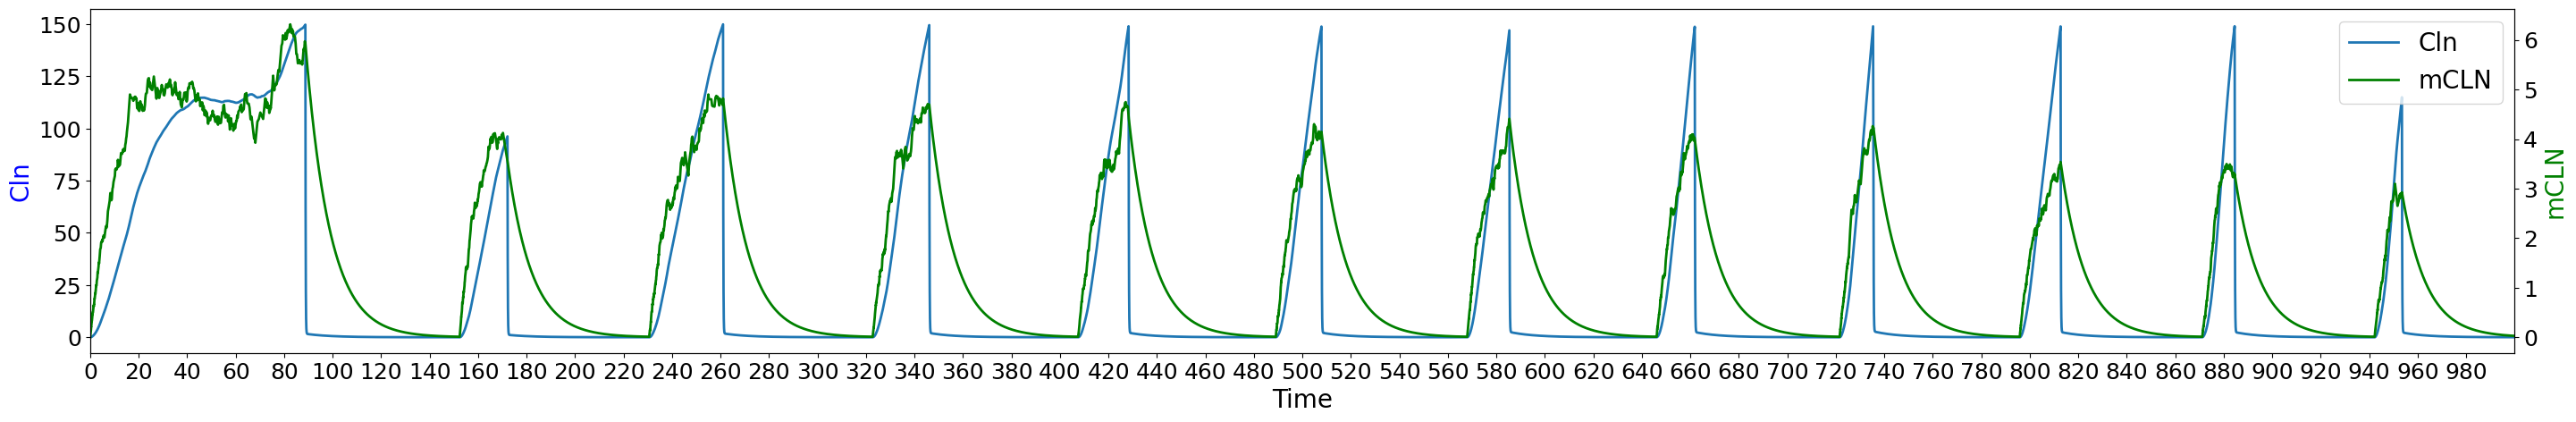

In [897]:
import seaborn as sns
# Plotting Cln vs mCLN
fig, ax = plt.subplots(figsize = (35, 5))
ax2 = ax.twinx() 
axe = ax.plot(sol.t, Cln, linewidth = 2,  label = 'Cln')
axe2 = ax2.plot(sol.t, mCLN, 'g', linewidth = 2, label = 'mCLN')
lns = axe + axe2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize = 20, loc = 1)
ax.set_xlabel('Time', fontsize = 20)
ax2.set_ylabel('mCLN', color = 'g', fontsize = 20)
ax.set_ylabel('Cln', color = 'b', fontsize = 20)
ax.set_xticks(np.arange(0, 1000, 20))
plt.show()

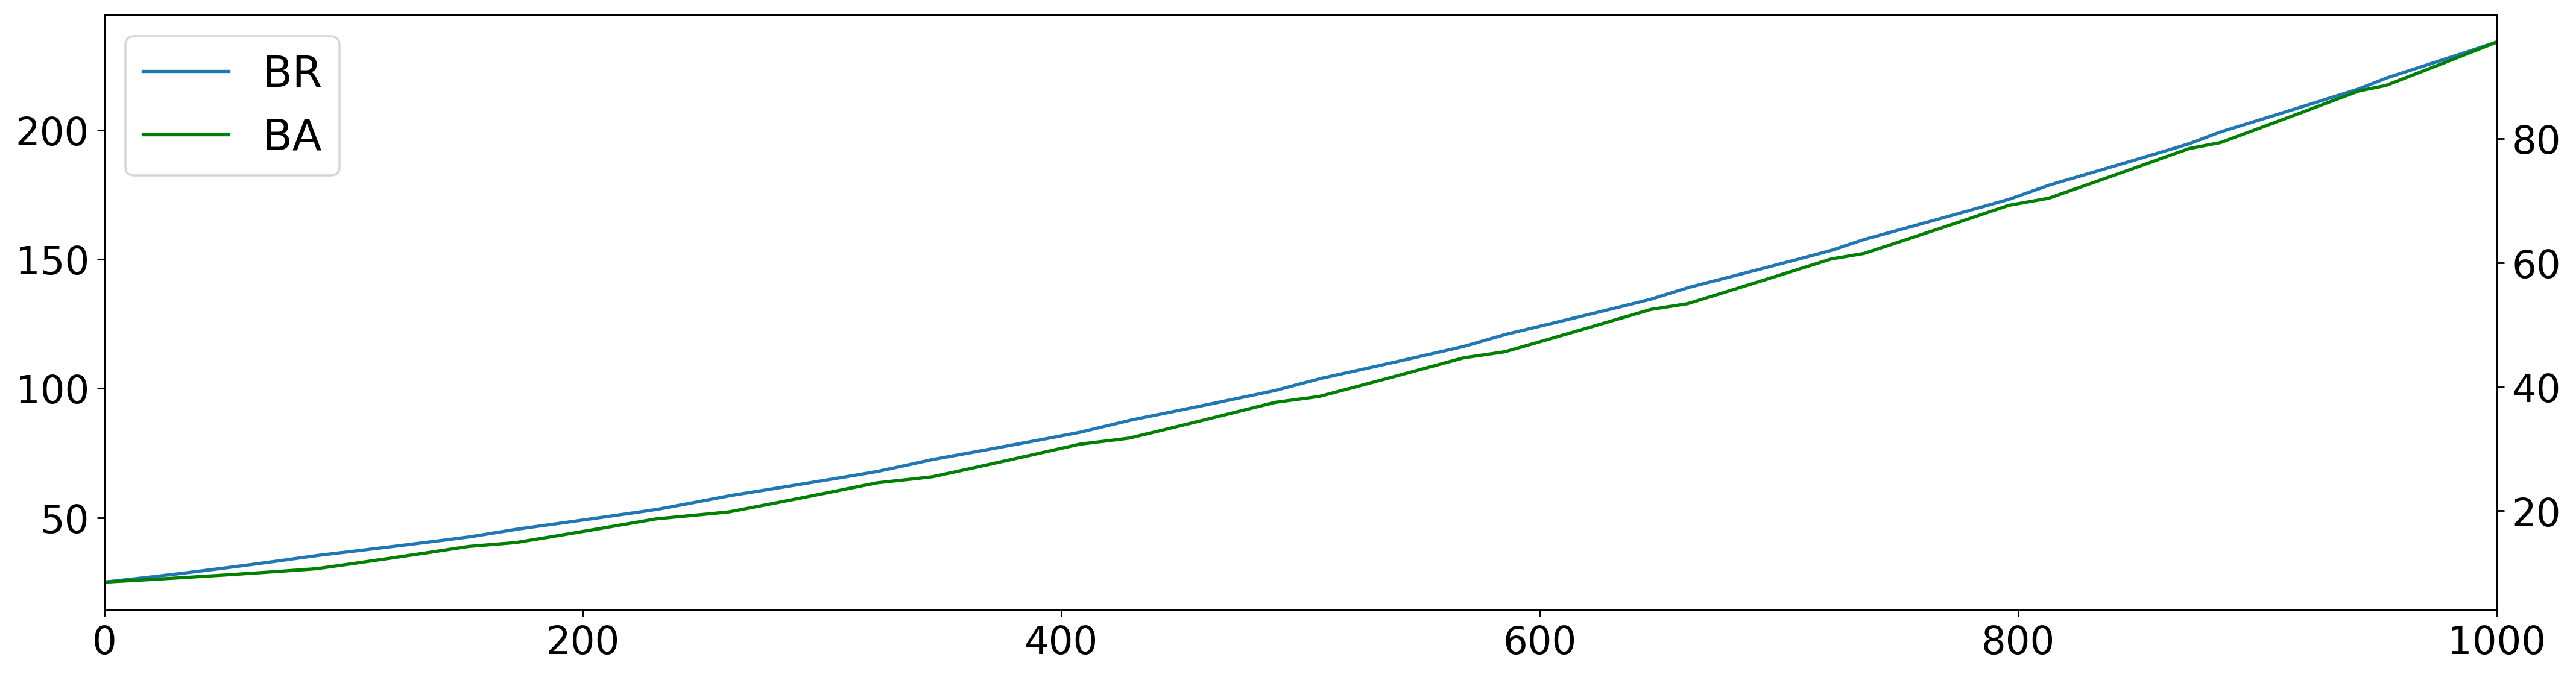

In [898]:
# Plotting BR vs BA
BA = BAm + BAd
fig, ax = plt.subplots(figsize = (20, 5), dpi = 256)
ax2 = ax.twinx() 
axe = ax.plot(sol.t, BR, label = 'BR')
axe2 = ax2.plot(sol.t, BA, 'g', label = 'BA')
lns = axe + axe2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize = 20)
plt.show()

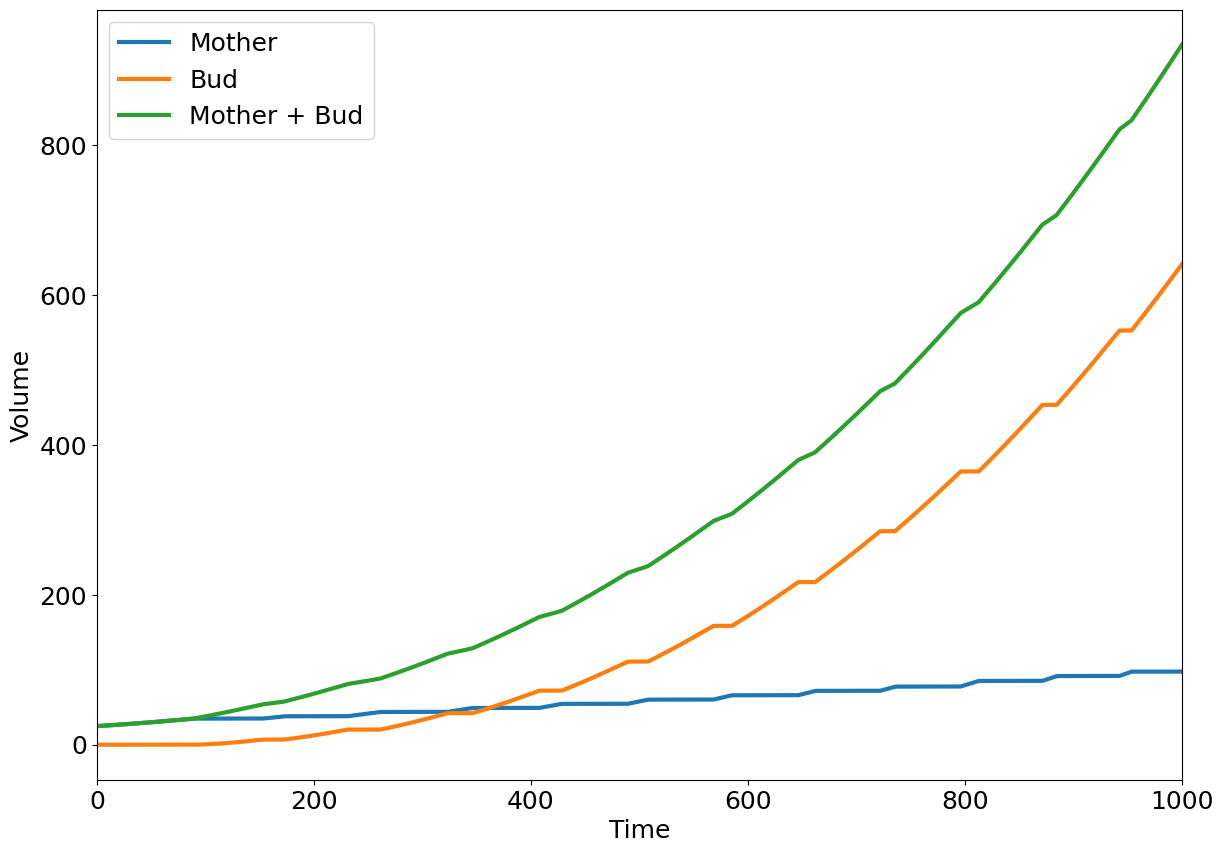

In [899]:
# Plotting Volume
Vboth = (kx*(BAm+BAd))**(3/2)
Vmother = (kx*(BAm))**(3/2)
Vbud = (kx*(BAd))**(3/2)
fig, ax = plt.subplots(figsize = (14, 10))
ax.plot(sol.t, Vmother, linewidth = 3, label = 'Mother')
ax.plot(sol.t, Vbud, linewidth = 3, label = 'Bud')
ax.plot(sol.t, Vboth, linewidth = 3, label = 'Mother + Bud')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
plt.legend()
plt.show()